# Software Undergound Rendezvous: Feb 5 2021
## Importance of noise estimates when solving inverse problems in the "real" world
## Part 2 Analysis
### Sean Walker

----

## Import modules


In [1]:
%matplotlib inline

In [9]:
from pathlib import Path
from types import SimpleNamespace

from scripts.dc_inv_utils import *


In [10]:
# take this out after done editting
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----

## Look at results

**Set up path**



In [11]:
# path to the directory containing our results
results_path = Path('results')




**Load the setup info**

In [17]:
# Get setup file name
setup_filename = Path(results_path / "setup.pkl")
# load file
setup_dict = load_results_dict(setup_filename)
# get variables out of the dict into the setup namespace s
s = SimpleNamespace(**setup_dict)

**Plot the starting model**

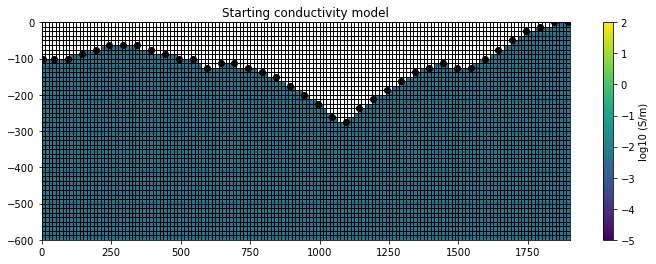

In [18]:
fig_model, ax_model = plot_model(s.mesh, np.log10(np.exp(s.starting_conductivity_model)), s.plotting_map, core_defn=s.core_defn, locations=s.unique_locations,
               clim=(-5, 2), grid=True, title='Starting conductivity model', cbar_title='log10 (S/m)')

**Plot the observed data as apparent resistivity**

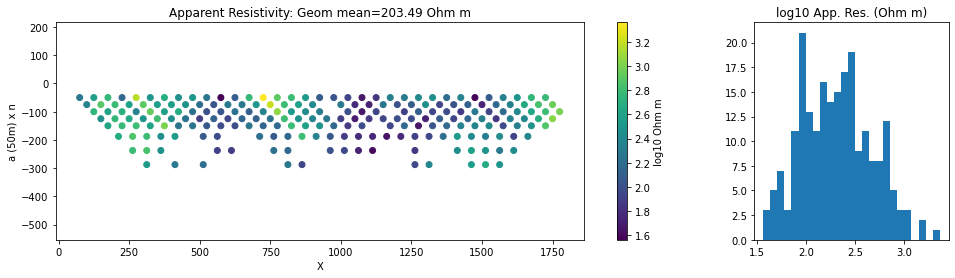

In [20]:
fig_ar, ax_ar = plot_data(np.c_[s.mid_x, s.mid_z, np.log10(s.app_res)], fig_ax=None,
                          data_title=f"Apparent Resistivity: Geom mean={s.app_res_mean:.2f} Ohm m", 
                          x_label='X', y_label='a (50m) x n', cbar_title='log10 Ohm m', bins=25,
                          hist_title='log10 App. Res. (Ohm m)')

**Plot the observed data as normalized voltage**

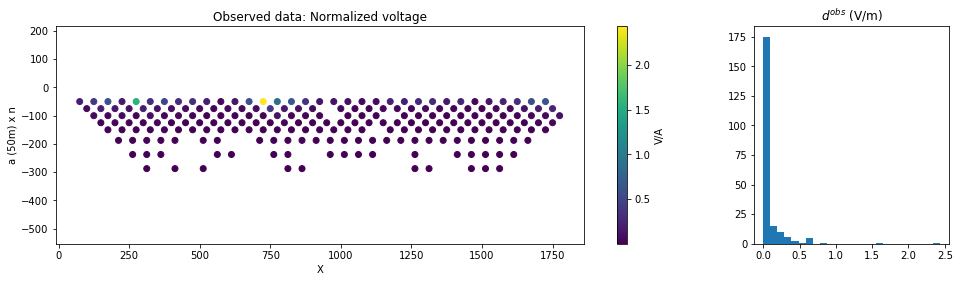

In [21]:
fig_dobs, ax_dobs = plot_data(np.c_[s.mid_x, s.mid_z, s.dc_data.dobs], fig_ax=None,
                          data_title='Observed data: Normalized voltage',
                          x_label='X', y_label='a (50m) x n', cbar_title='V/A', bins=25,
                          hist_title='$d^{obs}$ (V/m)')


**Plot the observed data as normalized voltage with a limited color range**

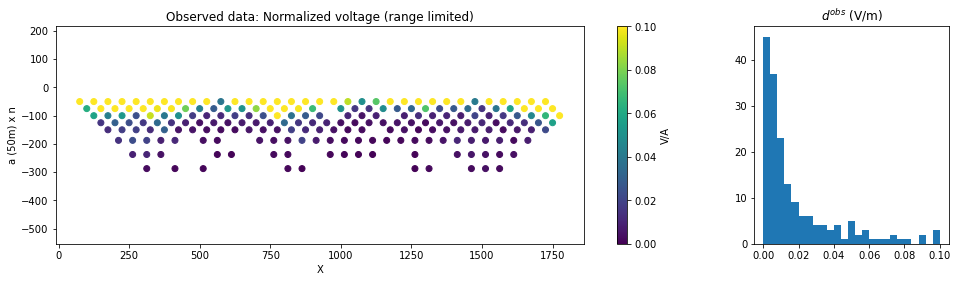

In [22]:
fig_dobs_lim, ax_dobs_lim = plot_data(np.c_[s.mid_x, s.mid_z, s.dc_data.dobs], fig_ax=None,
                          data_title='Observed data: Normalized voltage (range limited)', data_lim=[0, 0.1],
                          x_label='X', y_label='a (50m) x n', cbar_title='V/A', bins=25,
                          hist_title='$d^{obs}$ (V/m)')


**Load inversion results**

In [27]:
# load file
inv_5_per_filename = Path(results_path / "inv_std_dc_5_per.pkl")
inv_5_per_dict = load_results_dict(inv_std_dc_5_per_filename)
# get variables out of the dict into the setup namespace inv1
inv_5per = SimpleNamespace(**inv_std_dc_5_per_dict)


array([0.2224909 , 0.0446201 , 0.01843646, 0.00856633, 0.00463533,
       0.00675496, 0.00273478, 0.00176425, 0.26197804, 0.06690535,
       0.02524788, 0.01226015, 0.00917903, 0.01004015, 0.00438166,
       0.27975761, 0.06123182, 0.02399242, 0.01552983, 0.01005498,
       0.00778055, 0.00424663, 0.00154336, 0.23278061, 0.05574433,
       0.02818977, 0.01540609, 0.00634681, 0.00697538, 0.24268711,
       0.07051876, 0.02931733, 0.01038934, 0.00602561, 0.00675956,
       0.00136381, 0.29523146, 0.06570344, 0.01815617, 0.00927193,
       0.00564208, 0.18232003, 0.03243862, 0.01395621, 0.00750267,
       0.00422305, 0.00288253, 0.00167925, 0.14245724, 0.04079651,
       0.01766732, 0.00876467, 0.00250842, 0.00450027, 0.00236839,
       0.23263756, 0.05630555, 0.02163672, 0.00540266, 0.00566098,
       0.19746817, 0.04231106, 0.008453  , 0.00789474, 0.00387227,
       0.13915255, 0.01873617, 0.01507505, 0.00661098, 0.00410583,
       0.00509373, 0.0027009 , 0.00172264, 0.10836825, 0.05599

## Assign Uncertainties

Inversion with SimPEG requires that we define standard deviation on our data.
This represents our estimate of the noise in our data.

These values are used to form the data weighting matrix Wdii = 1/stdii

We need to choose a value.

5% is fairly common starting point. But why not 10% or 1%?

Should the large offsets have larger errors (n = 4,5: 15%  and n = 6: 20%?).

Should the error estimate have a minimum value sometimes called a noise floor? We choose this as an actual noise floor: 2 * noise level? Or a samll number to prevent 1/std being too large 1e-6?


## Run a bunch of inversions to see what happens

### Test #1: Change the percentage

Run inversion with 5 and 10%

Plot errors as Voltages in pseudo section and histogram 

Based on the phi_d equation we should be able see that the relative errors are the same for each (1/data amplitude). The difference is a constant (1/percentage). So the shape of the phi_d and phi_m curves should be the same. The amplitudes and beta values will be different.

Plot phi_d and phi_m from the various inversions.

Choose an optimal beta based on the curve flattening out.

Show that while phi_d is different for each of these the model is the same.

Good reminder of why choosing an arbitrary error estimate and ftiing to your theoretical target misfit is a bad idea.

### Test #2: Variable percentage

Run inversion n=1 to 3: 10%, n = 4,5: 15%, n = 6: 20%
Run inversion n=1 to 2: 5%,  n = 3,4: 10%, n = 5,6: 15%

Plot errors as Voltages in pseudo section and histogram 

Errors are different so we would expect inversion to behave differently.

### Test #3: % and floor

Run inversion 5% + 5% of std dev
Run inversion 5% + 2 * smallest value

Plot errors as Voltages in pseudo section and histogram 

Errors are different so we would expect inversion to behave differently.

In [9]:
np.std(dc_data.dobs)*0.05

0.01154872003339816

In [10]:
dc_data.dobs.min()*2

0.001236

In [11]:
Solver

pymatsolver.direct.Pardiso

In [12]:
# Compute standard deviations
std_dc_5_per = 0.05 * np.abs(dc_data.dobs)
# run inversion
out_5_per, out_all_5_per = setup_and_run_std_inv(mesh, dc_survey, dc_data, std_dc_5_per,
                                                 conductivity_map, ind_active,
                                                 starting_conductivity_model)



        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
        ***Done using same Solver and solverOpts as the problem***
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  6.25e-06  4.34e+04  0.00e+00  4.34e+04    8.40e-02      0              
   1  6.25e-06  4.33e+04  1.21e+01  4.33e+04    5.39e+00     13              
   2  1.25e-06  3.63e+04  2.88e+01  3.63e+04    1.05e+03      8              
   3  1.25e-06  2.73e+04  3.96e+01  2.73e+04    8.78e+02      3              
   4  2.50e-07  1.25e+04  7.60e+01  1.25e+04    8.45e+02      2              
   5  2.50e-07  8.12e+03  1.22e+02  8.12e+03    1.50e+03      0              
   6  5.00e-08  2.29e+03  1.03e+02  2.29e+03    2.74e+02      0              
   7  5.00e-08  1.94e+03  1.13e+02

In [15]:
# Compute standard deviations
std_dc_10_per = 0.10 * np.abs(dc_data.dobs)
# run inversion
out_10_per, out_all_10_per = setup_and_run_std_inv(mesh, dc_survey, dc_data, std_dc_10_per,
                                                 conductivity_map, ind_active,
                                                 starting_conductivity_model)


        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
        ***Done using same Solver and solverOpts as the problem***
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  1.46e-06  1.08e+04  0.00e+00  1.08e+04    2.10e-02      0              
   1  1.46e-06  1.08e+04  1.27e+01  1.08e+04    1.42e+00     13              
   2  2.91e-07  8.99e+03  2.52e+01  8.99e+03    3.52e+02      8              
   3  2.91e-07  4.05e+03  7.96e+01  4.05e+03    5.25e+02      2              
   4  5.83e-08  3.31e+03  1.10e+02  3.31e+03    5.88e+02      0              
   5  5.83e-08  6.93e+02  1.10e+02  6.93e+02    9.91e+01      0              
   6  1.17e-08  5.29e+02  1.03e+02  5.29e+02    4.73e+01      0   Skip BFGS  
   7  1.17e-08  4.67e+02  1.06e+02

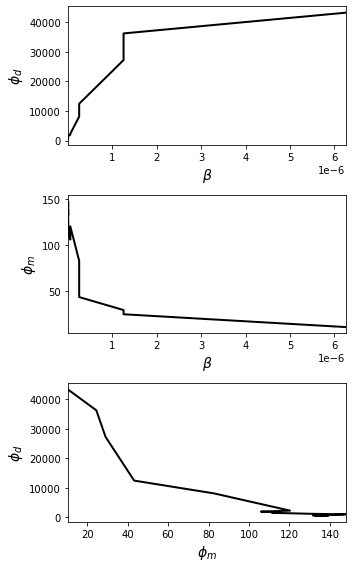

In [17]:
    out_5_per.plot_tikhonov_curves()

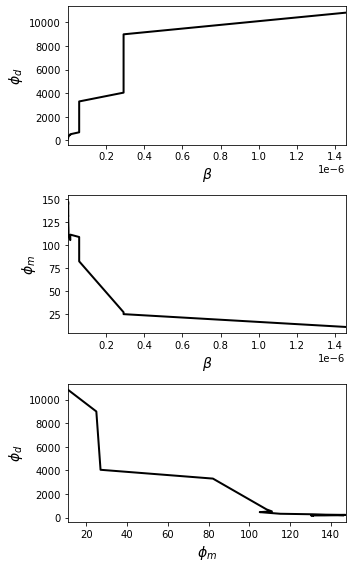

In [19]:
out_10_per.plot_tikhonov_curves()

## Create OcTree Mesh

Here, we create the OcTree mesh that will be used to predict both DC
resistivity and IP data.




In [ ]:
dh = 10.0  # base cell width
dom_width_x = 2400.0  # domain width x
dom_width_z = 1200.0  # domain width z
nbcx = 2 ** int(np.round(np.log(dom_width_x / dh) / np.log(2.0)))  # num. base cells x
nbcz = 2 ** int(np.round(np.log(dom_width_z / dh) / np.log(2.0)))  # num. base cells z

# Define the base mesh
hx = [(dh, nbcx)]
hz = [(dh, nbcz)]
mesh = TreeMesh([hx, hz], x0="CN")

# Mesh refinement based on topography
mesh = refine_tree_xyz(
    mesh, topo_xyz[:, [0, 2]], octree_levels=[1], method="surface", finalize=False
)

# Mesh refinement near transmitters and receivers
electrode_locations = np.r_[
    dc_survey.locations_a,
    dc_survey.locations_b,
    dc_survey.locations_m,
    dc_survey.locations_n,
]

unique_locations = np.unique(electrode_locations, axis=0)

mesh = refine_tree_xyz(
    mesh, unique_locations, octree_levels=[2, 4], method="radial", finalize=False
)

# Refine core mesh region
xp, zp = np.meshgrid([-800.0, 800.0], [-800.0, 0.0])
xyz = np.c_[mkvc(xp), mkvc(zp)]
mesh = refine_tree_xyz(mesh, xyz, octree_levels=[0, 2, 2], method="box", finalize=False)

mesh.finalize()

## Project Surveys to Discretized Topography

It is important that electrodes are not model as being in the air. Even if the
electrodes are properly located along surface topography, they may lie above
the discretized topography. This step is carried out to ensure all electrodes
like on the discretized surface.




In [ ]:
# Find cells that lie below surface topography
ind_active = surface2ind_topo(mesh, topo_xyz[:, [0, 2]])

# Shift electrodes to the surface of discretized topography
dc_survey.drape_electrodes_on_topography(mesh, ind_active, option="top")
ip_survey.drape_electrodes_on_topography(mesh, ind_active, option="top")

## Starting/Reference Model and Mapping on OcTree Mesh

Here, we would create starting and/or reference models for the DC inversion as
well as the mapping from the model space to the active cells. Starting and
reference models can be a constant background value or contain a-priori
structures. Here, the starting model is the natural log of 0.01 S/m.




In [ ]:
# Define conductivity model in S/m (or resistivity model in Ohm m)
air_conductivity = np.log(1e-8)
background_conductivity = np.log(1e-2)

active_map = maps.InjectActiveCells(mesh, ind_active, np.exp(air_conductivity))
nC = int(ind_active.sum())

conductivity_map = active_map * maps.ExpMap()

# Define model
starting_conductivity_model = background_conductivity * np.ones(nC)

## Define the Physics of the DC Simulation

Here, we define the physics of the DC resistivity problem.




In [ ]:
# Define the problem. Define the cells below topography and the mapping
dc_simulation = dc.simulation_2d.Simulation2DNodal(
    mesh, survey=dc_survey, sigmaMap=conductivity_map, Solver=Solver
)

## Define DC Inverse Problem

The inverse problem is defined by 3 things:

    1) Data Misfit: a measure of how well our recovered model explains the field data
    2) Regularization: constraints placed on the recovered model and a priori information
    3) Optimization: the numerical approach used to solve the inverse problem





In [ ]:
# Define the data misfit. Here the data misfit is the L2 norm of the weighted
# residual between the observed data and the data predicted for a given model.
# Within the data misfit, the residual between predicted and observed data are
# normalized by the data's standard deviation.
dc_data_misfit = data_misfit.L2DataMisfit(data=dc_data, simulation=dc_simulation)

# Define the regularization (model objective function)
dc_regularization = regularization.Simple(
    mesh,
    indActive=ind_active,
    mref=starting_conductivity_model,
    alpha_s=0.01,
    alpha_x=1,
    alpha_y=1,
)

# Define how the optimization problem is solved. Here we will use a projected
# Gauss-Newton approach that employs the conjugate gradient solver.
dc_optimization = optimization.ProjectedGNCG(
    maxIter=5, lower=-10.0, upper=2.0, maxIterLS=20, maxIterCG=10, tolCG=1e-3
)

# Here we define the inverse problem that is to be solved
dc_inverse_problem = inverse_problem.BaseInvProblem(
    dc_data_misfit, dc_regularization, dc_optimization
)

## Define DC Inversion Directives

Here we define any directives that are carried out during the inversion. This
includes the cooling schedule for the trade-off parameter (beta), stopping
criteria for the inversion and saving inversion results at each iteration.




In [ ]:
# Apply and update sensitivity weighting as the model updates
update_sensitivity_weighting = directives.UpdateSensitivityWeights()

# Defining a starting value for the trade-off parameter (beta) between the data
# misfit and the regularization.
starting_beta = directives.BetaEstimate_ByEig(beta0_ratio=1e1)

# Set the rate of reduction in trade-off parameter (beta) each time the
# the inverse problem is solved. And set the number of Gauss-Newton iterations
# for each trade-off paramter value.
beta_schedule = directives.BetaSchedule(coolingFactor=5, coolingRate=2)

# Options for outputting recovered models and predicted data for each beta.
save_iteration = directives.SaveOutputEveryIteration(save_txt=False)

# Setting a stopping criteria for the inversion.
target_misfit = directives.TargetMisfit(chifact=1)

directives_list = [
    update_sensitivity_weighting,
    starting_beta,
    beta_schedule,
    save_iteration,
    target_misfit,
]

## Running the DC Inversion

To define the inversion object, we need to define the inversion problem and
the set of directives. We can then run the inversion.




In [ ]:
# Here we combine the inverse problem and the set of directives
dc_inversion = inversion.BaseInversion(
    dc_inverse_problem, directiveList=directives_list
)

# Run inversion
recovered_conductivity_model = dc_inversion.run(starting_conductivity_model)

## Plotting True and Recovered Conductivity Model




In [ ]:
# Load true conductivity model
true_conductivity_model = np.loadtxt(str(true_conductivity_filename))
true_conductivity_model_log10 = np.log10(true_conductivity_model[ind_active])

# Plot True Model
fig = plt.figure(figsize=(9, 4))

plotting_map = maps.ActiveCells(mesh, ind_active, np.nan)

ax1 = fig.add_axes([0.1, 0.12, 0.72, 0.8])
mesh.plotImage(
    plotting_map * true_conductivity_model_log10,
    ax=ax1,
    grid=False,
    clim=(np.min(true_conductivity_model_log10), np.max(true_conductivity_model_log10)),
    range_x=[-700, 700],
    range_y=[-700, 0],
    pcolorOpts={"cmap": "viridis"},
)
ax1.set_title("True Conductivity Model")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("z (m)")

ax2 = fig.add_axes([0.83, 0.12, 0.05, 0.8])
norm = mpl.colors.Normalize(
    vmin=np.min(true_conductivity_model_log10),
    vmax=np.max(true_conductivity_model_log10),
)
cbar = mpl.colorbar.ColorbarBase(
    ax2, norm=norm, orientation="vertical", cmap=mpl.cm.viridis, format="10^%.1f"
)

cbar.set_label("$S/m$", rotation=270, labelpad=15, size=12)

plt.show()

# Plot Recovered Model
fig = plt.figure(figsize=(9, 4))

# Make conductivities in log10
recovered_conductivity_model_log10 = np.log10(np.exp(recovered_conductivity_model))

ax1 = fig.add_axes([0.1, 0.12, 0.72, 0.8])
mesh.plotImage(
    plotting_map * recovered_conductivity_model_log10,
    normal="Y",
    ax=ax1,
    grid=False,
    clim=(np.min(true_conductivity_model_log10), np.max(true_conductivity_model_log10)),
    range_x=[-700, 700],
    range_y=[-700, 0],
    pcolorOpts={"cmap": "viridis"},
)
ax1.set_title("Recovered Conductivity Model")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("z (m)")

ax2 = fig.add_axes([0.83, 0.12, 0.05, 0.8])
norm = mpl.colors.Normalize(
    vmin=np.min(true_conductivity_model_log10),
    vmax=np.max(true_conductivity_model_log10),
)
cbar = mpl.colorbar.ColorbarBase(
    ax2, norm=norm, orientation="vertical", cmap=mpl.cm.viridis, format="10^%.1f"
)
cbar.set_label("$S/m$", rotation=270, labelpad=15, size=12)

plt.show()

## Plotting Predicted DC Data and Misfit




In [ ]:
# Predicted data from recovered model
dpred_dc = dc_inverse_problem.dpred
dc_data_predicted = data.Data(dc_survey, dobs=dpred_dc)

data_array = [dc_data, dc_data_predicted, dc_data]
dobs_array = [None, None, (dobs_dc - dpred_dc) / std_dc]

fig = plt.figure(figsize=(17, 5.5))
plot_title = ["Observed", "Predicted", "Normalized Misfit"]
plot_type = ["appConductivity", "appConductivity", "misfitMap"]
plot_units = ["S/m", "S/m", ""]
scale = ["log", "log", "linear"]

ax1 = 3 * [None]
norm = 3 * [None]
cbar = 3 * [None]
cplot = 3 * [None]

for ii in range(0, 3):

    ax1[ii] = fig.add_axes([0.33 * ii + 0.03, 0.05, 0.25, 0.9])
    cplot[ii] = plot_pseudoSection(
        data_array[ii],
        dobs=dobs_array[ii],
        ax=ax1[ii],
        survey_type="dipole-dipole",
        data_type=plot_type[ii],
        scale=scale[ii],
        space_type="half-space",
        pcolorOpts={"cmap": "viridis"},
    )
    ax1[ii].set_title(plot_title[ii])

plt.show()

## Starting/Reference Model for IP Inversion

Here, we would create starting and/or reference models for the IP inversion as
well as the mapping from the model space to the active cells. Starting and
reference models can be a constant background value or contain a-priori
structures. Here, the starting model is the 1e-6 V/V.





In [ ]:
# Define conductivity model in S/m (or resistivity model in Ohm m)
air_chargeability = 0.0
background_chargeability = 1e-6

active_map = maps.InjectActiveCells(mesh, ind_active, air_chargeability)
nC = int(ind_active.sum())

chargeability_map = active_map

# Define model
starting_chargeability_model = background_chargeability * np.ones(nC)

## Define the Physics of the IP Simulation

Here, we define the physics of the IP problem. For the chargeability, we
require a mapping from the model space to the entire mesh. For the background
conductivity/resistivity, we require the conductivity/resistivity on the
entire mesh.




In [ ]:
ip_simulation = ip.simulation_2d.Simulation2DNodal(
    mesh,
    survey=ip_survey,
    etaMap=chargeability_map,
    sigma=conductivity_map * recovered_conductivity_model,
    Solver=Solver,
)

## Define IP Inverse Problem

Here we define the inverse problem in the same manner as the DC inverse problem.




In [ ]:
# Define the data misfit (Here we use weighted L2-norm)
ip_data_misfit = data_misfit.L2DataMisfit(data=ip_data, simulation=ip_simulation)

# Define the regularization (model objective function)
ip_regularization = regularization.Simple(
    mesh,
    indActive=ind_active,
    mapping=maps.IdentityMap(nP=nC),
    alpha_s=1,
    alpha_x=1,
    alpha_y=1,
)

# Define how the optimization problem is solved.
ip_optimization = optimization.ProjectedGNCG(
    maxIter=10, lower=0.0, upper=1.0, maxIterLS=20, maxIterCG=10, tolCG=1e-3
)

# Here we define the inverse problem that is to be solved
ip_inverse_problem = inverse_problem.BaseInvProblem(
    ip_data_misfit, ip_regularization, ip_optimization
)

## Define IP Inversion Directives

Here we define the directives in the same manner as the DC inverse problem.




In [ ]:
update_sensitivity_weighting = directives.UpdateSensitivityWeights(threshold=1e-3)
starting_beta = directives.BetaEstimate_ByEig(beta0_ratio=1e2)
beta_schedule = directives.BetaSchedule(coolingFactor=2, coolingRate=1)
save_iteration = directives.SaveOutputEveryIteration(save_txt=False)
target_misfit = directives.TargetMisfit(chifact=1.0)

directives_list = [
    update_sensitivity_weighting,
    starting_beta,
    beta_schedule,
    save_iteration,
    target_misfit,
]

## Define IP Inversion Directives

Here we define the directives in the same manner as the DC inverse problem.




In [ ]:
# Here we combine the inverse problem and the set of directives
ip_inversion = inversion.BaseInversion(
    ip_inverse_problem, directiveList=directives_list
)

# Run inversion
recovered_chargeability_model = ip_inversion.run(starting_chargeability_model)

## Plotting True Model and Recovered Chargeability Model




In [ ]:
true_chargeability_model = np.loadtxt(str(true_chargeability_filename))
true_chargeability_model = true_chargeability_model[ind_active]


# Plot True Model
fig = plt.figure(figsize=(9, 4))

plotting_map = maps.ActiveCells(mesh, ind_active, np.nan)

ax1 = fig.add_axes([0.1, 0.12, 0.72, 0.8])
mesh.plotImage(
    plotting_map * true_chargeability_model,
    ax=ax1,
    grid=False,
    clim=(np.min(true_chargeability_model), np.max(true_chargeability_model)),
    range_x=[-700, 700],
    range_y=[-700, 0],
    pcolorOpts={"cmap": "plasma"},
)
ax1.set_title("True Chargeability Model")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("z (m)")

ax2 = fig.add_axes([0.83, 0.12, 0.03, 0.8])
norm = mpl.colors.Normalize(
    vmin=np.min(true_chargeability_model), vmax=np.max(true_chargeability_model)
)
cbar = mpl.colorbar.ColorbarBase(
    ax2, norm=norm, orientation="vertical", cmap=mpl.cm.plasma
)
cbar.set_label("Intrinsic Chargeability (V/V)", rotation=270, labelpad=15, size=12)

plt.show()

# Plot Recovered Model
fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_axes([0.1, 0.12, 0.72, 0.8])
mesh.plotImage(
    plotting_map * recovered_chargeability_model,
    normal="Y",
    ax=ax1,
    grid=False,
    clim=(np.min(recovered_chargeability_model), np.max(recovered_chargeability_model)),
    range_x=[-700, 700],
    range_y=[-700, 0],
    pcolorOpts={"cmap": "plasma"},
)
ax1.set_title("Recovered Chargeability Model")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("z (m)")

ax2 = fig.add_axes([0.83, 0.12, 0.03, 0.8])
norm = mpl.colors.Normalize(
    vmin=np.min(recovered_chargeability_model),
    vmax=np.max(recovered_chargeability_model),
)
cbar = mpl.colorbar.ColorbarBase(
    ax2, norm=norm, orientation="vertical", cmap=mpl.cm.plasma
)
cbar.set_label("Intrinsic Chargeability (V/V)", rotation=270, labelpad=15, size=12)

plt.show()

## Plotting Predicted Data and Misfit




In [ ]:
dpred_ip = ip_inverse_problem.dpred
ip_data_predicted = data.Data(ip_survey, dobs=dpred_ip)

# Convert from voltage measurements to apparent chargeability by normalizing by
# the DC voltage
dobs_array = np.c_[dobs_ip / dobs_dc, dpred_ip / dobs_dc, (dobs_ip - dpred_ip) / std_ip]

fig = plt.figure(figsize=(17, 5.5))
plot_title = ["Observed", "Predicted", "Normalized Misfit"]
plot_type = ["appChargeability", "appChargeability", "volt"]
scale = ["linear", "linear", "linear"]

ax1 = 3 * [None]
norm = 3 * [None]
cbar = 3 * [None]
cplot = 3 * [None]

for ii in range(0, 3):

    ax1[ii] = fig.add_axes([0.33 * ii + 0.03, 0.11, 0.23, 0.85])
    cplot[ii] = plot_pseudoSection(
        ip_data,
        dobs=dobs_array[:, ii],
        ax=ax1[ii],
        survey_type="dipole-dipole",
        data_type=plot_type[ii],
        space_type="half-space",
        pcolorOpts={"cmap": "plasma"},
    )
    ax1[ii].set_title(plot_title[ii])
    ax1[ii].set_xlabel("x (m)")
    ax1[ii].set_ylabel("z (m)")

plt.show()